# 1.The Iris Dataset

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
iris= datasets.load_iris()

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df["target"] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 1.1 Preparing the Data

In [6]:
data = df.sample(frac=1, random_state=22)

In [7]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
115,6.4,3.2,5.3,2.3,2
54,6.5,2.8,4.6,1.5,1
146,6.3,2.5,5.0,1.9,2
63,6.1,2.9,4.7,1.4,1
...,...,...,...,...,...
102,7.1,3.0,5.9,2.1,2
100,6.3,3.3,6.0,2.5,2
44,5.1,3.8,1.9,0.4,0
132,6.4,2.8,5.6,2.2,2


In [8]:
# 10% of data to test and 90% for train

sizetrain = int(data.shape[0] * 0.9)
train = data.iloc[:sizetrain, :]
test = data.iloc[sizetrain:, :]

In [9]:
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
115,6.4,3.2,5.3,2.3,2
54,6.5,2.8,4.6,1.5,1
146,6.3,2.5,5.0,1.9,2
63,6.1,2.9,4.7,1.4,1
...,...,...,...,...,...
38,4.4,3.0,1.3,0.2,0
81,5.5,2.4,3.7,1.0,1
29,4.7,3.2,1.6,0.2,0
144,6.7,3.3,5.7,2.5,2


In [10]:
test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
111,6.4,2.7,5.3,1.9,2
133,6.3,2.8,5.1,1.5,2
8,4.4,2.9,1.4,0.2,0
127,6.1,3.0,4.9,1.8,2
34,4.9,3.1,1.5,0.2,0
93,5.0,2.3,3.3,1.0,1
45,4.8,3.0,1.4,0.3,0
14,5.8,4.0,1.2,0.2,0
136,6.3,3.4,5.6,2.4,2
84,5.4,3.0,4.5,1.5,1


### plots for the training set and test set across each pair of data

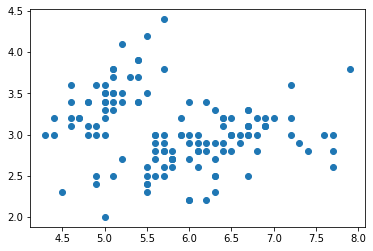

In [11]:
import matplotlib.pyplot as plt
sl = train["sepal length (cm)"]
sw = train["sepal width (cm)"]
plt.scatter(sl, sw)

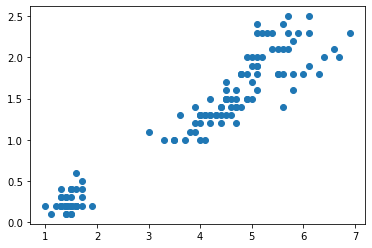

In [12]:
pl = train["petal length (cm)"]
pw = train["petal width (cm)"]
plt.scatter(pl,pw)

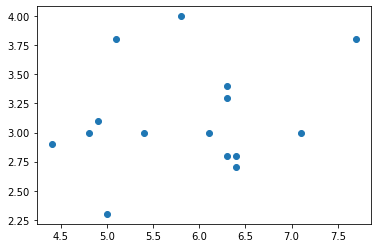

In [13]:
import matplotlib.pyplot as plt
tsl = test["sepal length (cm)"]
tsw = test["sepal width (cm)"]
plt.scatter(tsl, tsw)

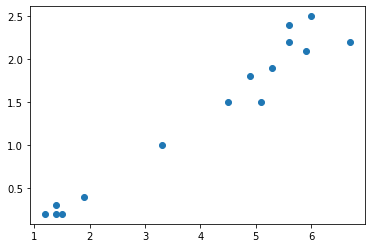

In [14]:
tpl = test["petal length (cm)"]
tpw = test["petal width (cm)"]
plt.scatter(tpl,tpw)

# 2 Linear Regression


####  1.sepal width as the input feature to predict sepal length


In [15]:
X_train=train["sepal width (cm)"]
y_train=train["sepal length (cm)"]

In [16]:
X_test=test["sepal width (cm)"]
y_test=test["sepal length (cm)"]

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [19]:
lr.coef_

array([-0.30656117])

In [20]:
lr.intercept_

6.775638754633757

In [21]:
lr.predict(pd.DataFrame(X_test))

array([5.94792361, 5.91726749, 5.88661137, 5.85595526, 5.82529914,
       6.07054807, 5.85595526, 5.54939409, 5.73333079, 5.85595526,
       5.85595526, 5.76398691, 5.61070633, 5.91726749, 5.61070633])

In [22]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [23]:
from sklearn import metrics

In [24]:
metrics.mean_squared_error(y_test,y_pred)

0.8682327458904778

#### 2.sepal length as the input feature to predict sepal width

In [25]:
X_train=train["sepal length (cm)"]
y_train=train["sepal width (cm)"]

In [26]:
X_test=test["sepal length (cm)"]
y_test=test["sepal width (cm)"]

In [27]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [28]:
lr.coef_

array([-0.08574147])

In [29]:
lr.intercept_

3.5504233346730873

In [30]:
lr.predict(pd.DataFrame(X_test))

array([3.00167792, 3.01025206, 3.17316086, 3.02740036, 3.13029012,
       3.12171598, 3.13886427, 3.0531228 , 3.01025206, 3.08741939,
       2.94165889, 3.01025206, 3.11314183, 3.00167792, 2.89021401])

In [31]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [32]:
metrics.mean_squared_error(y_test,y_pred)

0.22597595509707033

###  3.petal width as the input feature to predict petal length

In [33]:
X_train=train["petal width (cm)"]
y_train=train["petal length (cm)"]

In [34]:
X_test=test["petal width (cm)"]
y_test=test["petal length (cm)"]

In [35]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [36]:
lr.coef_

array([2.23639674])

In [37]:
lr.intercept_

1.0866275558537946

In [38]:
lr.predict(pd.DataFrame(X_test))

array([5.33578136, 4.44122267, 1.5339069 , 5.11214169, 1.5339069 ,
       3.3230243 , 1.75754658, 1.5339069 , 6.45397973, 4.44122267,
       5.78306071, 6.6776194 , 1.98118625, 6.00670038, 6.00670038])

In [39]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [40]:
metrics.mean_squared_error(y_test,y_pred)

0.1731637325350587

###  4.petal length as the input feature to predict petal width

In [41]:
X_train=train["petal length (cm)"]
y_train=train["petal width (cm)"]

In [42]:
X_test=test["petal length (cm)"]
y_test=test["petal width (cm)"]

In [43]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [44]:
lr.coef_

array([0.41276942])

In [45]:
lr.intercept_

-0.3576898208404682

In [46]:
lr.predict(pd.DataFrame(X_test))

array([1.8299881 , 1.74743422, 0.22018737, 1.66488034, 0.26146431,
       1.00444926, 0.22018737, 0.13763348, 1.95381893, 1.49977257,
       2.07764975, 2.1189267 , 0.42657208, 1.95381893, 2.40786529])

In [47]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [48]:
metrics.mean_squared_error(y_test,y_pred)

0.03654404521696108

####  5.sepal length as the input feature to predict petal length


In [49]:
X_train=train["sepal length (cm)"]
y_train=train["petal length (cm)"]

In [50]:
X_test=test["sepal length (cm)"]
y_test=test["petal length (cm)"]

In [51]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [52]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [53]:
metrics.mean_squared_error(y_test,y_pred)

1.038195880380684

####  6.petal length as the input feature to predict sepal length


In [54]:
X_train=train["petal length (cm)"]
y_train=train["sepal length (cm)"]

In [55]:
X_test=test["petal length (cm)"]
y_test=test["sepal length (cm)"]

In [56]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [57]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [58]:
metrics.mean_squared_error(y_test,y_pred)

0.21541004612373543

####  7.sepal length as the input feature to predict petal width


In [59]:
X_train=train["sepal length (cm)"]
y_train=train["petal width (cm)"]

In [60]:
X_test=test["sepal length (cm)"]
y_test=test["petal width (cm)"]

In [61]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [62]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [63]:
metrics.mean_squared_error(y_test,y_pred)

0.2773339682482196

####  8.petal width as the input feature to predict sepal length


In [64]:
X_train=train["petal width (cm)"]
y_train=train["sepal length (cm)"]

In [65]:
X_test=test["petal width (cm)"]
y_test=test["sepal length (cm)"]

In [66]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [67]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [68]:
metrics.mean_squared_error(y_test,y_pred)

0.2892713699606684

####  9.sepal width as the input feature to predict petal length


In [69]:
X_train=train["sepal width (cm)"]
y_train=train["petal length (cm)"]

In [70]:
X_test=test["sepal width (cm)"]
y_test=test["petal length (cm)"]

In [71]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [72]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [73]:
metrics.mean_squared_error(y_test,y_pred)

4.276645743983432

####  10.petal length as the input feature to predict sepal width


In [74]:
X_train=train["petal length (cm)"]
y_train=train["sepal width (cm)"]

In [75]:
X_test=test["petal length (cm)"]
y_test=test["sepal width (cm)"]

In [76]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [77]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [78]:
metrics.mean_squared_error(y_test,y_pred)

0.2382257651218796

####  11.sepal width as the input feature to predict petal width


In [79]:
X_train=train["sepal width (cm)"]
y_train=train["petal width (cm)"]

In [80]:
X_test=test["sepal width (cm)"]
y_test=test["petal width (cm)"]

In [81]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [82]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [83]:
metrics.mean_squared_error(y_test,y_pred)

0.8332919074535854

####  12.petal width as the input feature to predict sepal width


In [84]:
X_train=train["petal width (cm)"]
y_train=train["sepal width (cm)"]

In [85]:
X_test=test["petal width (cm)"]
y_test=test["sepal width (cm)"]

In [86]:
lr.fit(pd.DataFrame(X_train),y_train)

LinearRegression()

In [87]:
y_pred= lr.predict(pd.DataFrame(X_test))

In [88]:
metrics.mean_squared_error(y_test,y_pred)

0.23423881719653583

# 3 Logistic Regression


#### 1.taking w0 as sepal length w1 as sepal width and w2 as petal length 

In [91]:
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
115,6.4,3.2,5.3,2.3,2
54,6.5,2.8,4.6,1.5,1
146,6.3,2.5,5.0,1.9,2
63,6.1,2.9,4.7,1.4,1
...,...,...,...,...,...
38,4.4,3.0,1.3,0.2,0
81,5.5,2.4,3.7,1.0,1
29,4.7,3.2,1.6,0.2,0
144,6.7,3.3,5.7,2.5,2


In [105]:
X_train=train[["sepal length (cm)","sepal width (cm)","petal length (cm)"]]
y_train=train["target"]

In [106]:
X_test=test[["sepal length (cm)","sepal width (cm)","petal length (cm)"]]
y_test=test["target"]

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
lgrg= LogisticRegression()

In [110]:
lgrg.fit(pd.DataFrame(X_train),y_train)

LogisticRegression()

In [112]:
y_pred= lgrg.predict(pd.DataFrame(X_test))

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         8

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



#### 2.taking w0 as sepal length w1 as sepal width and w2 as petal width to predict petal width

In [121]:
X_train=train[["sepal length (cm)","sepal width (cm)","petal width (cm)"]]
y_train=train["target"]

In [122]:
X_test=test[["sepal length (cm)","sepal width (cm)","petal length (cm)"]]
y_test=test["target"]

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
lgrg.fit(pd.DataFrame(X_train),y_train)

LogisticRegression()

In [125]:
y_pred= lgrg.predict(pd.DataFrame(X_test))

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         2
           2       0.80      1.00      0.89         8

    accuracy                           0.73        15
   macro avg       0.60      0.53      0.55        15
weighted avg       0.76      0.73      0.72        15

